In [16]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


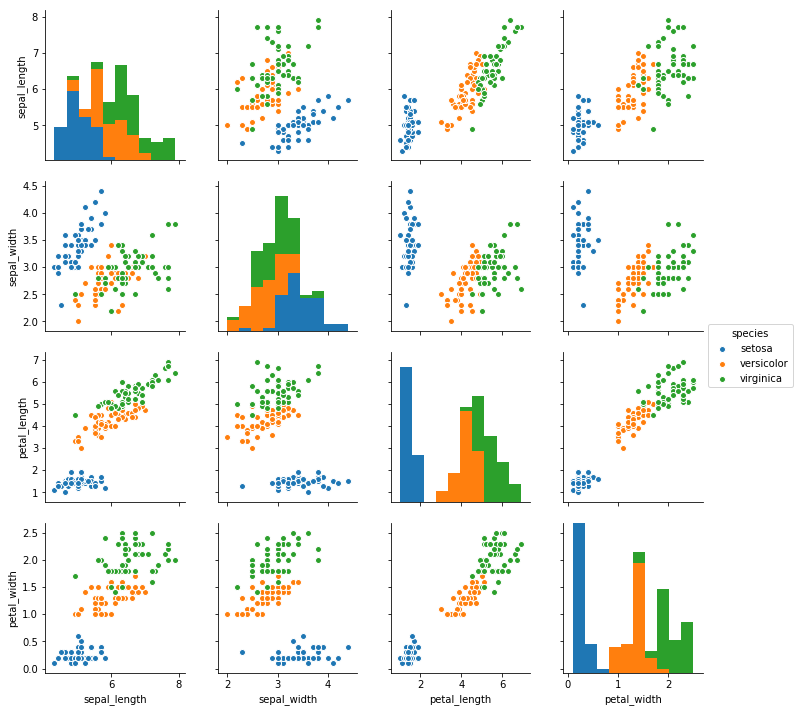

In [4]:
import seaborn as sns
sns.pairplot(iris, hue='species')

In [5]:
x_iris = iris.drop('species', axis=1)
x_iris.shape


(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

In [7]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

/usr/local/google/home/wzzhou/Documents/env/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
y_predict = model.predict(xtest)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_predict)

0.9736842105263158

In [11]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)
model.fit(x_iris)
x_2d = model.transform(x_iris)

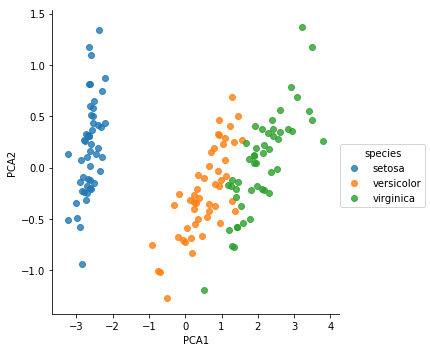

In [13]:
iris['PCA1'] = x_2d[:, 0]
iris['PCA2'] = x_2d[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [17]:
from sklearn.mixture import GMM 
model = GMM(n_components=3, covariance_type='full') 
model.fit(x_iris)
y_gmm = model.predict(x_iris) 

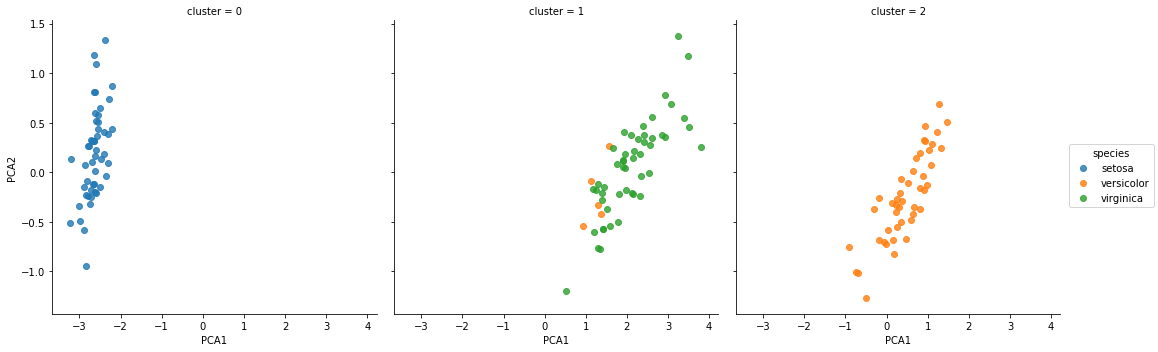

In [18]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);